In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections
import nltk
from nltk.corpus import stopwords
import re
from nltk import bigrams
import networkx as nx
import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [2]:
df_new = pd.read_csv('vader_processed_depressed_tweets.csv')
df_new.head()

,Unnamed: 0,Unnamed: 0.1,vader_sentiment_label,vader_score,clean_tweet
0,0,0,0,-0.4122,"Wow, dad yday: “you don’t take stupid depressi..."
1,1,1,0,-0.8074,part really harmfult lot people went every gui...
2,2,2,1,0.3382,one ways I got #depression learning dance rain...
3,3,3,0,-0.4588,"see wanna one say PTSD, depression, and/or anx..."
4,4,4,0,-0.8316,IS IT clinical depression palpable hopelessnes...


In [3]:
df_new['text'] = df_new['clean_tweet']
df_new['text']

0         Wow, dad yday: “you don’t take stupid depressi...
1         part really harmfult lot people went every gui...
2         one ways I got #depression learning dance rain...
3         see wanna one say PTSD, depression, and/or anx...
4         IS IT clinical depression palpable hopelessnes...
                                ...                        
249090                     えっ？！オニィ結構なお歳……（今知った） 変な声でちゃった(笑)
249091    #PhysicianFriday "Let's empower doctors take t...
249092    A spike suicides among teenage boys United Sta...
249093    Need support? Check following resources: Couns...
249094    You improve quality life friend need. Learn Me...
Name: text, Length: 249095, dtype: object

In [14]:
#helper to remove url in text content
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

str

In [15]:
no_urls_tweets = [remove_url(tweet) for tweet in df_new['text'].astype(str)]
no_urls_tweets[:5]

['Wow dad yday you dont take stupid depression drugs anymore though you Because theyre absolute worst thing and never need them Aint great family supportive My moms sisters stance similar btw',
 'part really harmfult lot people went every guideline understand 13rw horror show supposed insight depression mental illness overall helpful public narrative topic',
 'one ways I got depression learning dance rain It source strength stronger circumstances UncoveringthenewU ChangeYourMindChangeYourCircumstances pictwittercom3vxKuQ0DvD',
 'see wanna one say PTSD depression andor anxiety play LIKEE',
 'IS IT clinical depression palpable hopelessness generation']

In [16]:
words_in_tweets = [tweet.lower().split() for tweet in no_urls_tweets]
words_in_tweets[:2]

[['wow',
  'dad',
  'yday',
  'you',
  'dont',
  'take',
  'stupid',
  'depression',
  'drugs',
  'anymore',
  'though',
  'you',
  'because',
  'theyre',
  'absolute',
  'worst',
  'thing',
  'and',
  'never',
  'need',
  'them',
  'aint',
  'great',
  'family',
  'supportive',
  'my',
  'moms',
  'sisters',
  'stance',
  'similar',
  'btw'],
 ['part',
  'really',
  'harmfult',
  'lot',
  'people',
  'went',
  'every',
  'guideline',
  'understand',
  '13rw',
  'horror',
  'show',
  'supposed',
  'insight',
  'depression',
  'mental',
  'illness',
  'overall',
  'helpful',
  'public',
  'narrative',
  'topic']]

In [18]:
# List of all words across tweets
all_words_no_urls = list(itertools.chain(*words_in_tweets))

# Create counter
counts_no_urls = collections.Counter(all_words_no_urls)

counts_no_urls.most_common(15)

[('i', 77001),
 ('lonely', 55434),
 ('depression', 49852),
 ('suicide', 40433),
 ('im', 32030),
 ('like', 17530),
 ('depressed', 14559),
 ('people', 13928),
 ('the', 12158),
 ('you', 11952),
 ('feel', 11691),
 ('its', 11328),
 ('hopeless', 11237),
 ('get', 10490),
 ('it', 10397)]

In [19]:
clean_tweets_no_urls = pd.DataFrame(counts_no_urls.most_common(15),
                             columns=['words', 'count'])

clean_tweets_no_urls.head()

,words,count
0,i,77001
1,lonely,55434
2,depression,49852
3,suicide,40433
4,im,32030


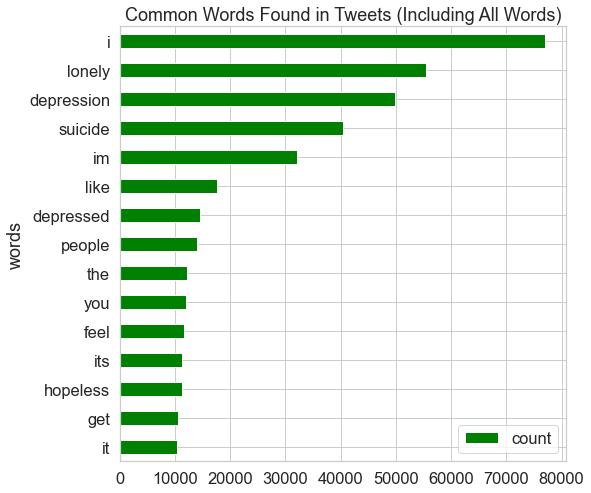

In [20]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_no_urls.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="green")

ax.set_title("Common Words Found in Tweets (Including All Words)")

plt.show()

In [21]:
stop_words = set(stopwords.words('english'))

# View a few words from the set
list(stop_words)[0:10]

['wasn',
 'nor',
 'y',
 'mightn',
 'doing',
 "hadn't",
 'its',
 'itself',
 'then',
 "weren't"]

In [22]:
# Remove stop words from each tweet list of words
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweets]

tweets_nsw[0]

['wow',
 'dad',
 'yday',
 'dont',
 'take',
 'stupid',
 'depression',
 'drugs',
 'anymore',
 'though',
 'theyre',
 'absolute',
 'worst',
 'thing',
 'never',
 'need',
 'aint',
 'great',
 'family',
 'supportive',
 'moms',
 'sisters',
 'stance',
 'similar',
 'btw']

In [23]:
all_words_nsw = list(itertools.chain(*tweets_nsw))

counts_nsw = collections.Counter(all_words_nsw)

counts_nsw.most_common(15)

[('lonely', 55434),
 ('depression', 49852),
 ('suicide', 40433),
 ('im', 32030),
 ('like', 17530),
 ('depressed', 14559),
 ('people', 13928),
 ('feel', 11691),
 ('hopeless', 11237),
 ('get', 10490),
 ('one', 10206),
 ('know', 9392),
 ('dont', 9032),
 ('de', 8988),
 ('time', 8697)]

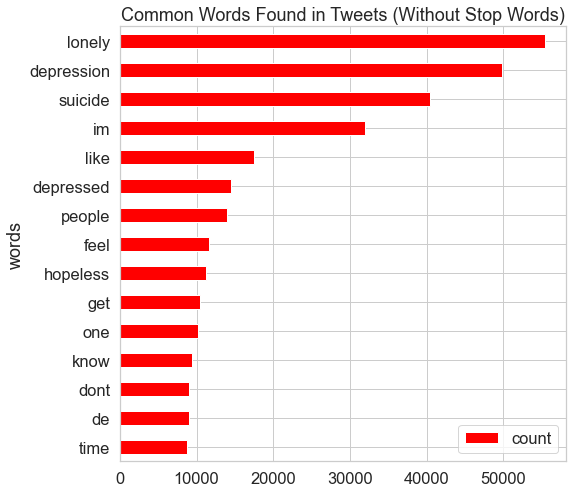

In [24]:
clean_tweets_nsw = pd.DataFrame(counts_nsw.most_common(15),
                             columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_nsw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="red")

ax.set_title("Common Words Found in Tweets (Without Stop Words)")

plt.show()

In [25]:
collection_words = ['im', 'de', 'like', 'one']
tweets_nsw_nc = [[w for w in word if not w in collection_words]
                 for word in tweets_nsw]

In [26]:
# Flatten list of words in clean tweets
all_words_nsw_nc = list(itertools.chain(*tweets_nsw_nc))

# Create counter of words in clean tweets
counts_nsw_nc = collections.Counter(all_words_nsw_nc)

counts_nsw_nc.most_common(15)

[('lonely', 55434),
 ('depression', 49852),
 ('suicide', 40433),
 ('depressed', 14559),
 ('people', 13928),
 ('feel', 11691),
 ('hopeless', 11237),
 ('get', 10490),
 ('know', 9392),
 ('dont', 9032),
 ('time', 8697),
 ('life', 8041),
 ('really', 7368),
 ('love', 7354),
 ('anxiety', 6765)]

In [27]:
len(counts_nsw_nc)

125594

In [28]:
clean_tweets_ncw = pd.DataFrame(counts_nsw_nc.most_common(15),
                             columns=['words', 'count'])
clean_tweets_ncw.head()

,words,count
0,lonely,55434
1,depression,49852
2,suicide,40433
3,depressed,14559
4,people,13928


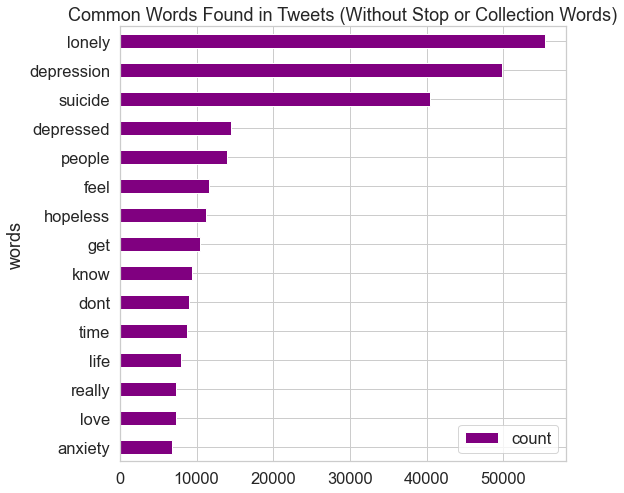

In [29]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_ncw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Without Stop or Collection Words)")

plt.show()

In [30]:
# Create list of lists containing bigrams in tweets
terms_bigram = [list(bigrams(tweet)) for tweet in tweets_nsw_nc]

# View bigrams for the first tweet
terms_bigram[0]

[('wow', 'dad'),
 ('dad', 'yday'),
 ('yday', 'dont'),
 ('dont', 'take'),
 ('take', 'stupid'),
 ('stupid', 'depression'),
 ('depression', 'drugs'),
 ('drugs', 'anymore'),
 ('anymore', 'though'),
 ('though', 'theyre'),
 ('theyre', 'absolute'),
 ('absolute', 'worst'),
 ('worst', 'thing'),
 ('thing', 'never'),
 ('never', 'need'),
 ('need', 'aint'),
 ('aint', 'great'),
 ('great', 'family'),
 ('family', 'supportive'),
 ('supportive', 'moms'),
 ('moms', 'sisters'),
 ('sisters', 'stance'),
 ('stance', 'similar'),
 ('similar', 'btw')]

In [31]:
# Flatten list of bigrams in clean tweets
bigrams = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)

bigram_counts.most_common(20)

[(('afraid', 'loneliness'), 4641),
 (('feel', 'lonely'), 3546),
 (('suicide', 'squad'), 2769),
 (('commit', 'suicide'), 2656),
 (('anxiety', 'depression'), 2588),
 (('depression', 'anxiety'), 2446),
 (('mental', 'health'), 1912),
 (('committed', 'suicide'), 1703),
 (('feeling', 'lonely'), 1648),
 (('seasonal', 'depression'), 1596),
 (('social', 'media'), 1512),
 (('hopeless', 'romantic'), 1347),
 (('suicide', 'bomber'), 1320),
 (('sad', 'lonely'), 1184),
 (('great', 'depression'), 1036),
 (('get', 'lonely'), 922),
 (('dont', 'know'), 870),
 (('tropical', 'depression'), 861),
 (('committing', 'suicide'), 848),
 (('cure', 'seasonal'), 847)]

In [32]:
bigram_df = pd.DataFrame(bigram_counts.most_common(20),
                             columns=['bigram', 'count'])

bigram_df

,bigram,count
0,"(afraid, loneliness)",4641
1,"(feel, lonely)",3546
2,"(suicide, squad)",2769
3,"(commit, suicide)",2656
4,"(anxiety, depression)",2588
5,"(depression, anxiety)",2446
6,"(mental, health)",1912
7,"(committed, suicide)",1703
8,"(feeling, lonely)",1648
9,"(seasonal, depression)",1596


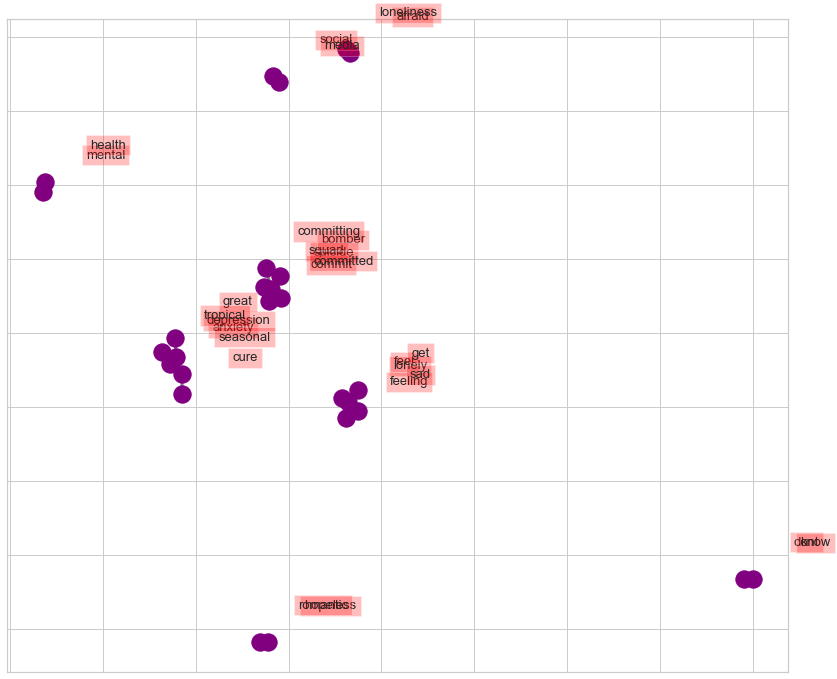

In [33]:
# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

fig, ax = plt.subplots(figsize=(14, 12))

pos = nx.spring_layout(G, k=1)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()